## Descriptive statistics & Inferential statistics


calculating mean, median, mode, charts, bell curves, and other tools to describe data. This is the most commonly understood part of statistics, called descriptive statistics, and we use it to summarize data.

Inferential statistics tries to uncover attributes about a larger population, often based on a sample.

In [1]:
# Number of pets each person owns
sample = [0, 1, 5, 7, 9, 10, 14]

def median(values):
    ordered = sorted(values)
    print(ordered)
    n = len(ordered)
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n/2)
    if n % 2 == 0:
        return (ordered[mid] + ordered[mid+1]) / 2.0
    else:
        return ordered[mid]
print(median(sample))
print(median(sample+[25000]))
# The median can be a helpful alternative to the mean when data is skewed by outliers,
# or values that are extremely large and small compared to the rest of the values


[0, 1, 5, 7, 9, 10, 14]
7
[0, 1, 5, 7, 9, 10, 14, 25000]
8.0


Median is less sensitive to outliers and cuts data strictly down the middle based on their relative order, rather than where they fall exactly on a number line. When your median is very different from your mean, that means you have a skewed dataset with outliers.
### The Median Is a Quantile
There is a concept of quantiles in descriptive statistics. The concept of quantiles is essentially the same as a median, just cutting the data in other places besides the middle. The median is actually the 50% quantile, or the value where 50% of ordered values are behind it. Then there are the 25%, 50%, and 75% quantiles, which are known as quartiles because they cut data in 25% increments.

In [2]:
# Number of pets each person owns
from collections import defaultdict
sample = [1, 3, 2, 5, 7, 0, 2, 3]

def mode(values):
    counts = defaultdict(lambda: 0)
    for s in values:
        counts[s] += 1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print(mode(sample)) # bimodal

[2, 3]


## Population Variance and Standard Deviation

let's say we have the data of number of pets owned by 7 people

|Value|Mean|Difference|
|-----|-----|----------|
|0|6.571|-6.571|
|1|6.571|-5.571|
|5|6.571|-1.571|
|7|6.571|0.429|
|9|6.571|2.429|
|10|6.571|3.429|
|14|6.571|7.429|

![Spread of data](images/Statistics_spread.png)

We could take the average of the differences, but they would sum up to 0. we could sum the absolute values. and a better approach is to square the values and then sum them up. this will amplify the larger differences. THen we average them.
This is called as *Variance* $\sigma^2$, a measure of how spread out the data is.

\begin{split}
\sigma^2 = \frac {\sum{(x_{i}-\mu)^2}} {N}
\end{split}

In [3]:
# Number of pets each person owns
data = [0, 1, 5, 7, 9, 10, 14]

def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / len(values)
    return _variance

print(variance(data))


21.387755102040813


OK ! , But what is this 21.38.. and how does it relate to our data. since we did a lot of squaring and summing, lets take the square root of it

\begin{split}
\sigma = \sqrt{\frac {\sum{(x_{i}-\mu)^2}} {N}}
\end{split}


In [4]:
from math import sqrt
# Number of pets each person owns
data = [0, 1, 5, 7, 9, 10, 14]

def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / len(values)
    return _variance

def std_dev(values):
    return sqrt(variance(values))

print(f'{std_dev(data):.2f} pets')

4.62 pets


## Sample Variance and Standard Deviation

\begin{split}
s^2 = \frac {\sum{(x_{i}-\overline{x})^2}} {n-1}\\

s = \sqrt{\frac {\sum{(x_{i}-\overline{x})^2}} {n-1}}
\end{split}


Did you catch the difference? When we average the squared differences, we divide by $n–1$ rather than the total number of items n. Why would we do this? We do this to decrease any bias in a sample and not underestimate the variance of the population based on our sample. By counting values short of one item in our divisor, we increase the variance and therefore capture greater uncertainty in our sample

In [5]:
from math import sqrt
# Number of pets each person owns
data = [0, 1, 5, 7, 9, 10, 14]
def variance(values, is_sample: bool = False):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / (len(values) - (1 if is_sample else 0))
    return _variance

def std_dev(values, is_sample: bool = False):
    return sqrt(variance(values, is_sample))

print("VARIANCE sample= {}".format(variance(data, is_sample=True))) 
print("STD DEV  sample= {}".format(std_dev(data, is_sample=True))) 
print("VARIANCE population = {}".format(variance(data, is_sample=False))) 
print("STD DEV  population = {}".format(std_dev(data, is_sample=False))) 

VARIANCE sample= 24.95238095238095
STD DEV  sample= 4.99523582550223
VARIANCE population = 21.387755102040813
STD DEV  population = 4.624689730353898


## Normal Distribution

The normal distribution, also known as the Gaussian distribution, is a symmetrical bell-shaped distribution that has most mass around the mean, and its spread is defined as a standard deviation. The “tails” on either side become
thinner as you move away from the mean

#### Properties of a Normal Distribution
The normal distribution has several important properties that make it useful:
- It’s symmetrical; both sides are identically mirrored at the mean, which is the
center.
- Most mass is at the center around the mean.
- It has a spread (being narrow or wide) that is specified by standard deviation.
- The “tails” are the least likely outcomes and approach zero infinitely but never
touch zero.
- It resembles a lot of phenomena in nature and daily life, and even generalizes
nonnormal problems because of the central limit theorem, which we will talk
about shortly.

##### Probability Density Function (PDF)

\begin{split}
f\left( x \right) = \frac {1}{\sigma} * \sqrt{2\pi} \ * e^{-\frac{1}{2}\left( \frac{x-\mu^2}{\sigma} \right)}
\end{split}

In [6]:
from math import exp,pi

# normal distribution, returns likelihood
def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * pi * std_dev ** 2) ** 0.5) *\
        exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))

normal distribution, the vertical axis is not the probability but rather the
likelihood for the data. The normal distribution is continuous. This means to retrieve a probability we need to integrate a range of x values to find an area.

#### Cumulative Distribution Function (CDF)

With the normal distribution, the vertical axis is not the probability but rather the likelihood for the data. To find the probability we need to look at a given range, and then find the area under the curve for that range

![CDF vs PDF](images/StatisticsCDFvsPDF.png)

The CDF, which is an S-shaped curve (called a sigmoid curve), projects the area up to that range in the PDF. Observe in image that when we capture the area from negative infinity up to 64.43 (the mean), our CDF shows a value of exactly .5 or 50%!

In [7]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99
x = norm.cdf(64.43, mean, std_dev)
print(x)

0.5


In [8]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99
x = norm.cdf(66, mean, std_dev) - norm.cdf(62, mean, std_dev)
print(x) 

# You should find the probability of observing a values between 62 and 66
# to be 0.4920, or approximately 49.2%.

0.4920450147062894


#### Inverse CDF
When we start doing hypothesis testing later in this chapter, we will encounter
situations where we need to look up an area on the CDF and then return the
corresponding x-value. Of course this is a backward usage of the CDF, so we will need to use the inverse CDF

![Inverse CDF](images/Statistics_inverseCDF.png)

In [9]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99
x = norm.ppf(.95, loc=mean, scale=std_dev)
print(x)

69.3481123445849


You can also use the inverse CDF to generate random numbers that follow the
normal distribution.

In [10]:
import random
from scipy.stats import norm
for i in range(0,10):
    random_p = random.uniform(0.0, 1.0)
    random_weight = norm.ppf(random_p, loc=64.43, scale=2.99)
    print(random_weight)

63.490177956916305
64.1953478493131
61.666000005811576
62.27535339721622
64.25804584209453
65.1078709068818
66.07803674522901
63.55057922936345
66.97806672574868
63.825559151205596


#### Z-Score

It is common to rescale a normal distribution so that the mean is 0 and the standard deviation is 1, which is known as the standard normal distribution. This makes it easy to compare the spread of one normal distribution to another normal distribution, even if they have different means and variances.

Of particular importance with the standard normal distribution is it expresses all
x-values in terms of standard deviations, known as Z-scores. Turning an x-value into a Z-score uses a basic scaling formula:

\begin{split}
z = \frac{x - \mu}{\sigma}
\end{split}

Here is an example. We have two homes from two different neighborhoods. Neigh‐
borhood A has a mean home value of $140,000 and standard deviation of $3,000.
Neighborhood B has a mean home value of $800,000 and standard deviation of
$10,000.
\begin{split}
\mu_{A} = 140,000\\
\mu_{B} = 800,000\\
\sigma_{A} = 3,000\\
\sigma_{B} = 10,000\\
\end{split}
Now we have two homes from each neighborhood. House A from neighborhood A is
worth $150,000 and house B from neighborhood B is worth $815,000. Which home is
more expensive relative to the average home in its neighborhood?
\begin{split}
x_{A} = 150,000\\
x_{B} = 815,000\\
\end{split}
If we express these two values in terms of standard deviations, we can compare them
relative to each neighborhood mean. Use the Z-score formula
\begin{gather*}
z=\frac{x - mean}{std}\\
z_{A}=\frac{150000-140000}{3000} = 3.333\\
z_{B}=\frac{815000-800000}{10000} = 1.5\\
\end{gather*}


In [11]:
#Turn Z-scores into x-values and vice versa
def z_score(x, mean, std):
    return (x - mean) / std

def z_to_x(z, mean, std):
    return (z * std) + mean

mean = 140000
std_dev = 3000
x = 150000

# Convert to Z-score and then back to X
z = z_score(x, mean, std_dev)
back_to_x = z_to_x(z, mean, std_dev)

print("Z-Score: {}".format(z)) # Z-Score: 3.333
print("Back to X: {}".format(back_to_x)) # Back to X: 150000.0

Z-Score: 3.3333333333333335
Back to X: 150000.0


#### Coefficient of Variation

A helpful tool for measuring spread is the coefficient of variation. It compares two distributions and quantifies how spread out each of them is. It is simple to calculate: divide the standard deviation by the mean. Here is the formula alongside the example comparing two neighborhoods

\begin{gather*}
cv=\frac{\sigma}{\mu}\\
cv_{A}=\frac{3000}{140000}=0.0214\\
cv_{B}=\frac{10000}{800000}=0.0125
\end{gather*}

As seen here, neighborhood A, while cheaper than neighborhood B, has more spread
and therefore more price diversity than neighborhood B.

### Inferential Statistics
#### The Central Limit Theorem

Let’s pretend I am measuring a population that is truly and uniformly random. Any
value between 0.0 and 1.0 is equally likely, and no value has any preference. But
something fascinating happens when we take increasingly large samples from this population, take the average of each, and then plot them into a histogram.



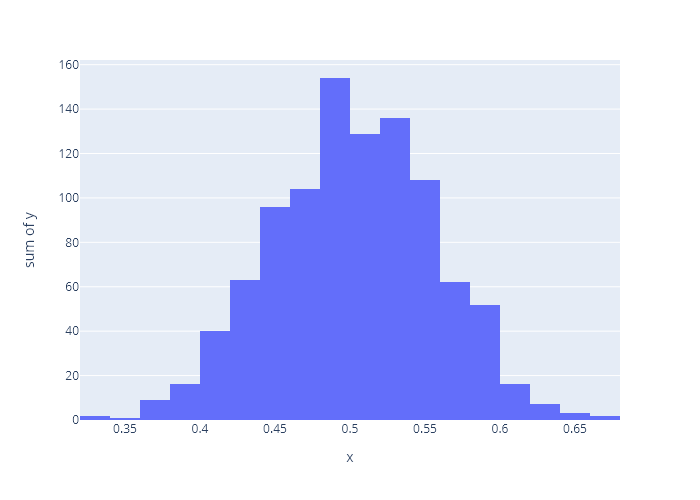

In [27]:
import random
import plotly.express as px
sample_size = 31
sample_count = 1000
# Central limit theorem, 1000 samples each with 31
# random numbers between 0.0 and 1.0
x_values = [(sum([random.uniform(0.0, 1.0) for i in range(sample_size)]) / \
sample_size) for _ in range(sample_count)]

y_values = [1 for _ in range(sample_count)]

px.histogram(x=x_values, y = y_values, nbins=20).show("png")

how did we end up a normal distribution when we started from sum of small 31 item groups from a uniform distribution ?

This is because of the central limit theorem, which states that interesting things
happen when we take large enough samples of a population, calculate the mean of
each, and plot them as a distribution:
1. The mean of the sample means is equal to the population mean.
2. If the population is normal, then the sample means will be normal.
3. If the population is not normal, but the sample size is greater than 30, the sample
means will still roughly form a normal distribution.
4. The standard deviation of the sample means equals the population standard
deviation divided by the square root of n:

\begin{split}
sample\ standard\ deviation = \frac{population\ standard\ deviation}{\sqrt{sample\ size}}
\end{split}

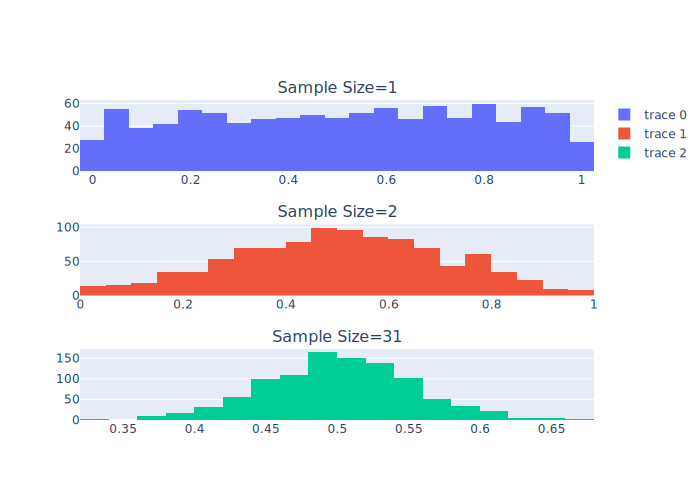

In [26]:
from plotly.subplots import make_subplots
samples=[1,2,31]

fig = make_subplots(rows=3, cols=1,subplot_titles=[a for a in (f"Sample Size={i}" for i in samples)])

for i,s_size in enumerate(samples):
    x_values = [(sum([random.uniform(0.0, 1.0) for i in range(s_size)]) / \
s_size) for _ in range(sample_count)]
    y_values = [1 for _ in range(sample_count)]

    fig.add_histogram(x=x_values,y=y_values,nbinsx=20,row=i+1,col=1)

fig.show("svg")




#### Confidence Intervals

A confidence interval is a range calculation showing how confidently we believe a sample mean (or other parameter) falls in a range for the population mean.

Based on a sample of 31 golden retrievers with a sample mean of 64.408 and a sample
standard deviation of 2.05, I am 95% confident that the population mean lies between 63.686 and 65.1296

![Confidence Interval](images/Statistics_LOC.png)

In [14]:
def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)
print(critical_z_value(p=.95))

(-1.959963984540054, 1.959963984540054)


OK, so we get ±1.95996, which is our critical z-value capturing 95% of probability
at the center of the standard normal distribution

Margin of Error

which is the range around the sample mean that contains the population mean at that level of confidence. Recall that our sample of 31 golden retrievers has a mean of 64.408 and standard deviation of 2.05.

\begin{gather*}
E\ =\pm z_{C}\frac{s}{\sqrt{n}}\\
E\ =\pm 1.95996*\frac{2.05}{\sqrt{31}}\\
E\ =\pm 0.72164
\end{gather*}

if we apply that margin of error against the sample mean, we finally get the confidence interval !

\begin{gather*}
95\%\ confidence\ interval\ = 64.408 \pm 0.72164\\
\end{gather*}


In [15]:
def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=.95, sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


So the way to interpret this is “based on my sample of 31 golden retriever weights
with sample mean 64.408 and sample standard deviation of 2.05, I am 95% confident
the population mean lies between 63.686 and 65.1296.” That is how we describe our
confidence interval

### Understanding P-Values

When we say something is *statistically significant*, what do we mean by that?

In 1925, mathematician Ronald Fisher was at a party. One of his colleagues Muriel
Bristol claimed she could detect when tea was poured before milk simply by tasting it.
Intrigued by the claim, Ronald set up an experiment on the spot.
He prepared eight cups of tea. Four had milk poured first; the other four had tea
poured first. He then presented them to his connoisseur colleague and asked her to
identify the pour order for each. Remarkably, she identified them all correctly, and the probability of this happening by chance is 1 in 70, or 0.01428571

This 1.4% probability is what we call the p-value. The probability of something occurring by chance rather than because of a hypothesized explanation.

When we frame an experiment, whether it is determining if organic donuts cause
weight gain or living near power lines causes cancer, we always have to entertain
the possibility that random luck played a role. Just like there is a 1.4% chance
Muriel identified the cups of tea correctly simply by guessing, there’s always a chance randomness just gave us a good hand like a slot machine. This helps us frame our null hypothesis ($H_{0}$), saying that the variable in question had no impact on the experiment and any positive results are just random luck. The alternative hypothesis ($H_{1}$) poses that a variable in question (called the controlled variable) is causing a positive result.

Traditionally, the threshold for statistical significance is a p-value of 5% or less, or .05. Since .014 is less than .05, this would mean we can reject our null hypothesis that Muriel was randomly guessing. We can then promote the alternative hypothesis that Muriel had a special ability to detect whether tea or milk was poured first.

#### Hypothesis Testing

Past studies have shown that the mean recovery time for a cold is 18 days, with a
standard deviation of 1.5 days, and follows a normal distribution.
This means there is approximately 95% chance of recovery taking between 15 and 21
days as shown 

![Hypothesis Testing](images/Statistics_HypothesisTesting.png)

In [16]:
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# 95% probability recovery time takes between 15 and 21 days.
x = norm.cdf(21, mean, std_dev) - norm.cdf(15, mean, std_dev)
print(x)

0.9544997361036416


We can infer then from the remaining 5% probability that there’s a 2.5% chance of
recovery taking longer than 21 days and a 2.5% chance of it taking fewer than 15
days

Now let’s say an experimental new drug was given to a test group of 40 people, and it took an average of 16 days for them to recover from the cold. Did the drug have an impact? If you reason long enough, you may realize what we are asking is this: does the drug show a statistically signficant result? Or did the drug not work and the 16-day recovery was a coincidence with the test group? That first question frames our alternative hypothesis, while the second question frames our null
hypothesis.

There are two ways we can calculate this: the one-tailed and two-tailed test.

#### One-Tailed Test
When we approach the one-tailed test, we typically frame our null and alternative
hypotheses using inequalities. We hypothesize around the population mean and say that it either is greater than/equal to 18 (the null hypothesis $H_{0}$) or less than 18 (the alternative hypothesis $H_{1}$):
\begin{split}
H_{0}:population\ mean ≥ 18\\
H_{1}:population\ mean < 18
\end{split}

To reject our null hypothesis, we need to show that our sample mean of the patients
who took the drug is not likely to have been coincidental. Since a p-value of .05 or less is traditionally considered statistically signficant, we will use that as our threshold

In [17]:
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# What x-value has 5% of area behind it?
x = norm.ppf(.05, mean, std_dev)
print(x)

15.53271955957279


we find that approximately 15.53 is the number of recovery days that gives us .05 area on the left tail. Therefore, if we achieve an average 15.53 or fewer days of recovery time in our sample group, our drug is considered statistically significant enough to have shown an impact. However, our sample mean of recovery time is actually 16 days and does not fall into this null hypothesis rejection zone. Therefore, the statistical significance test has failed

In [18]:
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# Probability of 16 or less days
p_value = norm.cdf(16, mean, std_dev)
print(p_value) 

0.09121121972586788


Since the p-value of .0912 is greater than our statistical significance threshold of .05, we do not consider the drug trial a success and fail to reject our null hypothesis.

#### Two-Tailed Test
The previous test we performed is called the one-tailed test because it looks for
statistical significance only on one tail. However, it is often safer and better practice to use a two-tailed test. We will elaborate why, but first let’s calculate it. To do a two-tailed test, we frame our null and alternative hypothesis in an “equal” and “not equal” structure.

In our drug test, we will say the null hypothesis has a mean recovery time of 18 days. But our alternative hypothesis is the mean recovery time is not 18 days, thanks to the new drug:

\begin{split}
H_{0}:population\ mean = 18\\
H_{1}:population\ mean \ne 18
\end{split}

This has an important implication. We are structuring our alternative hypothesis to
not test whether the drug improves cold recovery time, but if it had any impact. This includes testing if it increased the duration of the cold. Is this helpful? 
Naturally, this means we spread our p-value statistical significance threshold to both tails, not just one. If we are testing for a statistical significance of 5%, then we split it and give each 2.5% half to each tail. If our drug’s mean recovery time falls in either region, our test is successful and we reject the null hypothesis 

In [19]:
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# What x-value has 2.5% of area behind it?
x1 = norm.ppf(.025, mean, std_dev)
# What x-value has 97.5% of area behind it
x2 = norm.ppf(.975, mean, std_dev)
print(x1) 
print(x2) 

15.060054023189918
20.93994597681008


The sample mean value for the drug test group is 16, and 16 is not less than 15.06
nor greater than 20.9399. So like the one-tailed test, we still fail to reject the null hypothesis. But what is the p-value? This is where it gets interesting with two-tailed tests. Our p-value is going to capture not just the area to the left of 16 but also the symmetrical equivalent area on the right tail. Since 16 is 2 days below the mean, we will also capture the area above 20, which is 2 days above the mean. This is capturing the probability of an event or rarer, on both sides of the bell curve.

In [20]:
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# Probability of 16 or less days
p1 = norm.cdf(16, mean, std_dev)
# Probability of 20 or more days
p2 = 1.0 - norm.cdf(20, mean, std_dev)
# P-value of both tails
p_value = p1 + p2
print(p_value)

0.18242243945173575


You will notice that even when our objective is to show we may have lessened something (the cold-recovery time using a drug), reframing our hypothesis to show any impact (greater or lesser) creates a higher significance threshold. If our  significance threshold is a p-value of .05 or less, our one-tailed test was closer to acceptance at p-value .0912 as opposed to the two-tailed test, which was about double that at p-value .182.

This means the two-tailed test makes it harder to reject the null hypothesis and
demands stronger evidence to pass a test.

### The T-Distribution: Dealing with Small Samples

if we have 30 or fewer items in a sample we would opt to use a T-distribution instead of a normal distribution. The T-distribution is like a normal distribution but has fatter tails to reflect more variance and uncertainty

In [21]:
from scipy.stats import t
# get critical value range for 95% confidence
# with a sample size of 25
n = 25
lower = t.ppf(.025, df=n-1)
upper = t.ppf(.975, df=n-1)
print(lower, upper)

-2.063898561628021 2.0638985616280205


## Excercises
1. You bought a spool of 1.75 mm filament for your 3D printer. You want to
measure how close the filament diameter really is to 1.75 mm. You use a caliper
tool and sample the diameter five times on the spool:

1.78, 1.75, 1.72, 1.74, 1.77

Calculate the mean and standard deviation for this set of values

Ans: 
\begin{split}
\sigma = \sqrt{\frac {\sum{(x_{i}-\mu)^2}} {N}}
\end{split}

In [22]:
data = [1.78, 1.75, 1.72, 1.74, 1.77]

mean = sum(data)/len(data)

print(f'Mean is {mean}')
_variance = sum((v - mean) ** 2 for v in data) / len(data)
std = sqrt(_variance)
print(f'STD is {std}')

Mean is 1.752
STD is 0.02135415650406264


2. A manufacturer says the Z-Phone smart phone has a mean consumer life of 42
months with a standard deviation of 8 months. Assuming a normal distribution,
what is the probability a given random Z-Phone will last between 20 and 30
months?

In [23]:
mean = 42 # months
std = 8 # months

print(norm.cdf(30,mean,std) - norm.cdf(20,mean,std))

0.0638274380338035


3. I am skeptical that my 3D printer filament is not 1.75 mm in average diameter
as advertised. I sampled 34 measurements with my tool. The sample mean is 1.715588 and the sample standard deviation is 0.029252

What is the 99% confidence interval for the mean of my entire spool of filament?

In [24]:
mean = 1.715588
std = 0.029252
N = 34

# the critical z value

def critical_z_value(p,mean=0.0, std=1.0):
    norm_dist = norm(loc=mean,scale=std)
    left_area = (1.0 - p)/2.0
    right_area = 1.0 - ((1.0 - p)/2.0)
    print(f'left-area:{left_area}, right-area:{right_area}')
    return norm_dist.ppf(left_area),norm_dist.ppf(right_area)




def ci_large_sample(p,sample_mean,sample_std,n):
    lower,upper = critical_z_value(p)
    print(f'lower:{lower}, upper:{upper}')
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(ci_large_sample(p=.99, sample_mean=mean,sample_std=std, n=N))

left-area:0.0050000000000000044, right-area:0.995
lower:-2.5758293035489004, upper:2.5758293035489004
(1.7026658973748656, 1.7285101026251342)


Your marketing department has started a new advertising campaign and wants to
know if it affected sales, which in the past averaged $10,345 a day with a standard deviation of $552. The new advertising campaign ran for 45 days and averaged $11,641 in sales. Did the campaign affect sales? Why or why not? (Use a two-tailed test for more reliable significance.)

In [25]:
mean = 10345
std = 552

N = 45
new_mean = 11641

# H0 NULL hypothesis is average sales = 10345
# H1 alternative is average sales != 10345 ( campaign affected the sales)

# P value should be less than 5% to show that, its not random chance and the 
# campaign indeed have an effect on sales 

p1 = 1-norm.cdf(11641, mean, std)
p_value = 2*p1

print(f'P-Value: {p_value*100:.4f}%')

if p_value <=0.05:
    print("passes two tailed test")
else:
    print("Failed two tailed test")



P-Value: 1.8883%
passes two tailed test
